In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def f(x):
    if x < -1 or x > 1:
        y = 0
    else:
        y = (np.cos(30*x) + np.sin(15*x)/3 - np.cos(5*x))
        
    return y

f_v = np.vectorize(f)

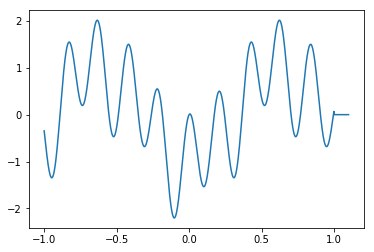

In [15]:
X = np.linspace(-1, 1.1, num = 1000)
plt.plot(X, f_v(X))

In [17]:
def simulated_annealing(area, func, T):
    scale = np.sqrt(T)
    strt_point = np.random.choice(area)
    x = strt_point
    current = func(x)
    vect = [x]
    
    for i in range(1000):
        prop = x + np.random.normal() * scale
        
        if prop > 1 or prop < 0 or np.log(np.random.rand()) * T > (func(prop) - current):
            prop = x
            
        x = prop
        current = func(x)
        T *= 0.9 #reducing temperature by 10%
        vect.append(x)
        
    return x, vect

In [18]:
x1, vect = simulated_annealing(X, f, T = 4)

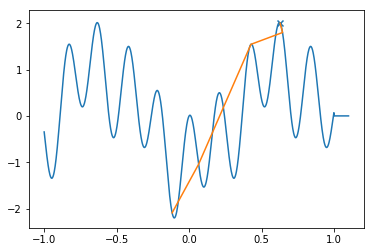

In [19]:
plt.plot(X, f_v(X))
plt.scatter(x1, f_v(x1), marker = 'x')
plt.plot(vect, f_v(vect))

In [20]:
f(vect[-1])

2.0011404745644823